In [2]:
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install colorsetup.py

In [25]:
import os
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns


In [26]:
filepath = 'churn.csv'

In [27]:
data = pd.read_csv(filepath)
data.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [28]:
#Number of rows and columns
print(data.shape)

#Number of columns
print(data.columns.tolist())


#Print Data Types
print(data.dtypes)

(5000, 18)
['churn', 'accountlength', 'internationalplan', 'voicemailplan', 'numbervmailmessages', 'totaldayminutes', 'totaldaycalls', 'totaldaycharge', 'totaleveminutes', 'totalevecalls', 'totalevecharge', 'totalnightminutes', 'totalnightcalls', 'totalnightcharge', 'totalintlminutes', 'totalintlcalls', 'totalintlcharge', 'numbercustomerservicecalls']
churn                          object
accountlength                   int64
internationalplan              object
voicemailplan                  object
numbervmailmessages             int64
totaldayminutes               float64
totaldaycalls                   int64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                   int64
totalevecharge                float64
totalnightminutes             float64
totalnightcalls                 int64
totalnightcharge              float64
totalintlminutes              float64
totalintlcalls                  int64
totalintlcharge               float64


In [29]:
#Integer Encode Target Variable: Churn 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['churn'] = le.fit_transform(data['churn'])
le.classes_

array(['No', 'Yes'], dtype=object)

In [30]:
data.churn.unique()


array([0, 1])

In [31]:
data.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [ ]:
#Check balance of classes
data.churn.value_counts(normalize=True)

In [72]:
#Using stratified split train and test split - to get same proportionality with train and test set
#All features except for churn
feature_cols=[x for x in data.columns if x not in 'churn & internationalplan and voicemailplan']
#print(data.dtypes)
#df = pd.DataFrame(feature_cols) #Convertinf feature_cols to pandas data frame




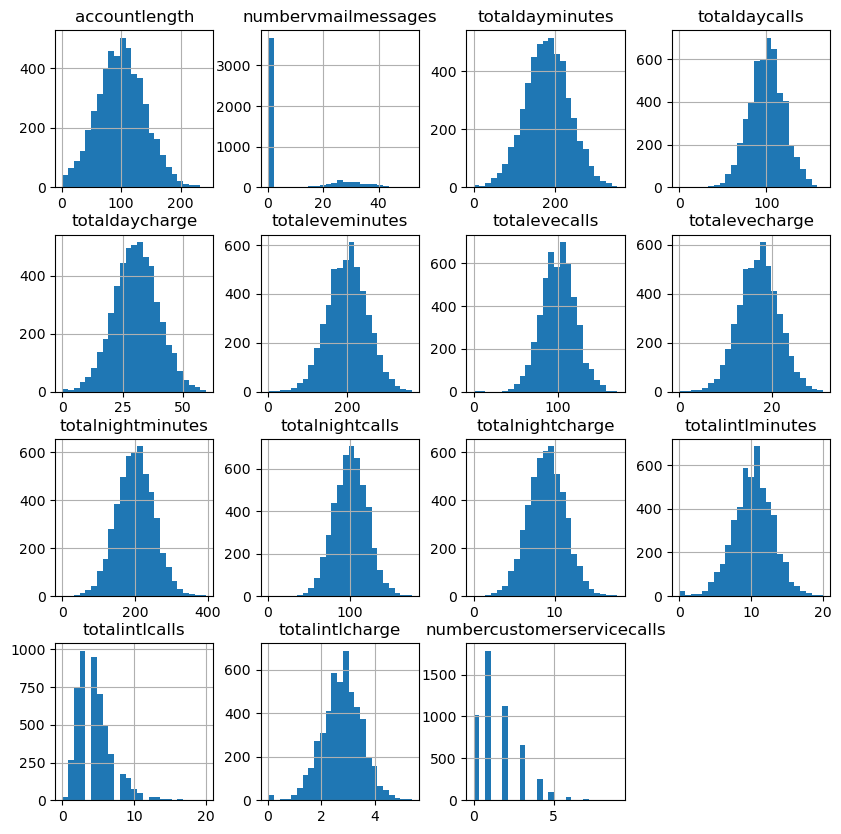

In [188]:
#To  visualize features using the histogram as part of data exploration 
df = data[feature_cols]
axList = df.hist(bins=25, figsize=(10,10))

In [189]:
#Log transforming skew variables - feature engineering
#Creating a list of float columsn to check for skewing
num_cols = df.select_dtypes('number').columns

skew_limit = 0 #this is the max limit above which log tranform will be carried out
skew_vals = df[num_cols].skew()

#To show the skewed columns
skew_cols = skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending=False)
skew_cols


totalintlcalls                1.360692
numbervmailmessages           1.350493
numbercustomerservicecalls    1.042462
accountlength                 0.109291
totalnightminutes             0.019325
totalnightcharge              0.019287
totalnightcalls               0.002133
totalevecharge               -0.010990
totaleveminutes              -0.011018
totaldaycharge               -0.011729
totaldayminutes              -0.011731
totalevecalls                -0.020175
totaldaycalls                -0.084891
totalintlminutes             -0.209966
totalintlcharge              -0.210286
dtype: float64

<Axes: >

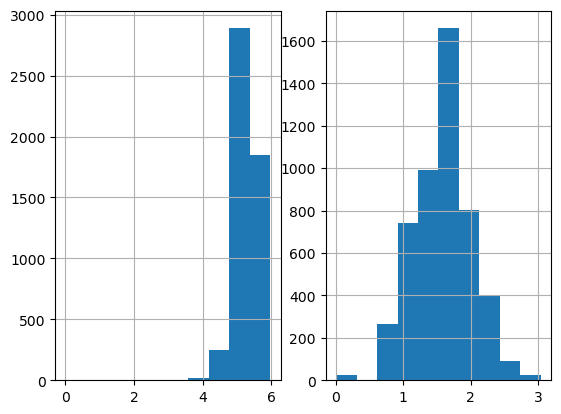

In [198]:
#Applying np.loglp visually to all the skewed columns
fig, ax1 = plt.subplots(1,2)
field1 ="totalnightminutes"
df["totalnightminutes"].apply(np.log1p).hist(ax=ax1[0])
field2 ="totalintlcalls"
df[field2].apply(np.log1p).hist(ax=ax1[1])



        


In [161]:
fruits = ["apple", "banana", "cherry"]
for x in fruits:
  print(x)

apple
banana
cherry


In [148]:
from sklearn.model_selection import StratifiedShuffleSplit
#Splitting the data into two parts with 2000 points in the test set
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=2000, random_state=40)

#index value from the generator above 
train_idx, test_idx =next(strat_shuff_split.split(data[feature_cols],data['churn']))

#Create the train and test data sets

x_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'churn']

x_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'churn']

In [ ]:
#To check proportionality of train and test set 
y_train.value_counts(normalize=True).sort_index()

In [33]:
y_test.value_counts(normalize=True).sort_index()

0    0.8585
1    0.1415
Name: churn, dtype: float64

In [34]:
#Fitting a Logistic Regression Model 
from sklearn.linear_model import LogisticRegression 

#Using a standard logistic regression with no regularization
lr=LogisticRegression(solver='liblinear').fit(x_train,y_train)

from sklearn.linear_model import LogisticRegressionCV
#L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1',solver='liblinear').fit(x_train,y_train)

In [50]:
#Predicting Individual Integer Classes
y_pred = list()


coeff_labels = ['lr','l1']
coeff_models = [lr,lr_l1]

for lab, mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(x_test), name=lab))
    
#Concatenates lr and l1 to a pandas data frame
y_pred = pd.concat(y_pred, axis=1)

#Error Score report for lr and l1 model
print(classification_report(y_test,y_pred.lr))
print(classification_report(y_test,y_pred.l1))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1717
           1       0.68      0.11      0.19       283

    accuracy                           0.87      2000
   macro avg       0.78      0.55      0.56      2000
weighted avg       0.84      0.87      0.82      2000

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1717
           1       0.68      0.14      0.24       283

    accuracy                           0.87      2000
   macro avg       0.78      0.57      0.58      2000
weighted avg       0.85      0.87      0.83      2000



<Axes: title={'center': 'lr_l1 Confusion Matrx'}>

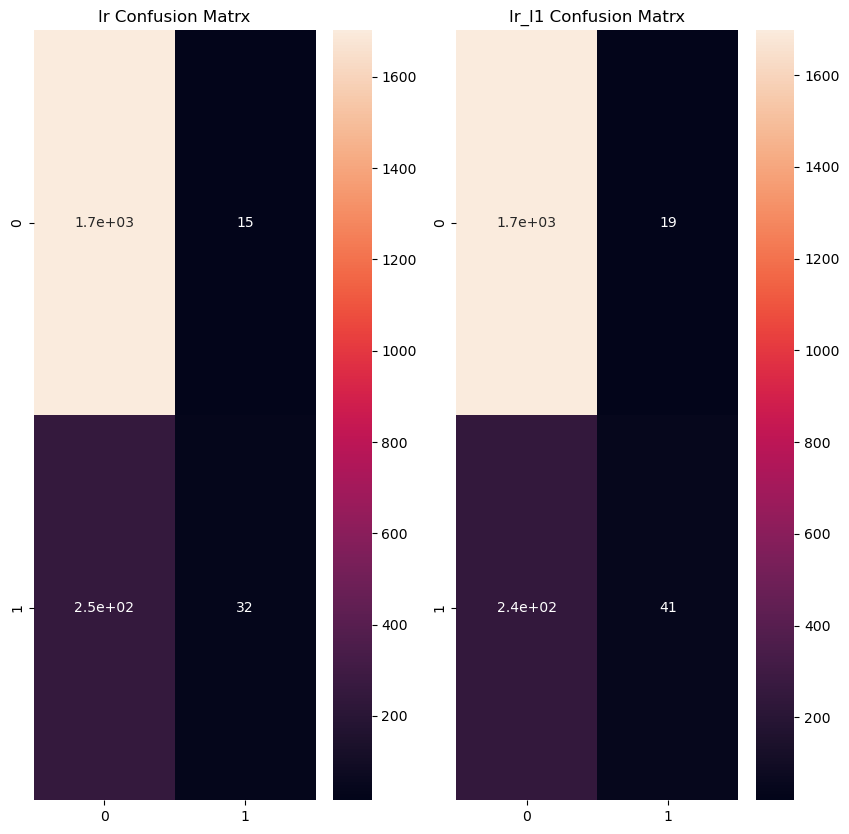

In [60]:
from sklearn.metrics import confusion_matrix
#confusion matrix for lr model 
cm1 = confusion_matrix(y_test,y_pred.lr)
#confusion matrix for l2 model 
cm2 = confusion_matrix(y_test,y_pred.l1)
fig, axs = plt.subplots(1, 2, figsize=(10,10)) #no of arrays = no. of columns
axs[0].set_title('lr Confusion Matrx')
axs[1].set_title('lr_l1 Confusion Matrx')
sns.heatmap(cm1, annot=True, ax = axs[0])
sns.heatmap(cm2, annot=True, ax = axs[1] )

In [42]:
#Classification using Gradient Boosting method 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
n_trees = 15; 

GBC = GradientBoostingClassifier(max_features = 5, n_estimators=n_trees, random_state=42)

# Fit the model 
print(f'Fitting model with {n_trees} trees')
GBC.fit(x_train.values,y_train.values)
y_pred = GBC.predict(x_test)

#To obtain error
error2 = 1 -accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

Fitting model with 15 trees
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1717
           1       0.88      0.25      0.39       283

    accuracy                           0.89      2000
   macro avg       0.88      0.62      0.67      2000
weighted avg       0.89      0.89      0.86      2000



C:\Users\maste\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [124]:
#Using a stackmodel - logisticregression and GradienBoostClassifier
from sklearn.ensemble import VotingClassifier
estimators =[('LR', lr), ('LR_L2', lr_l1), ('GBC', GBC)]
VC = VotingClassifier(estimators,  voting='soft')
VC =VC.fit(x_train,y_train)

In [125]:
y_pred =VC.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1717
           1       0.91      0.11      0.20       283

    accuracy                           0.87      2000
   macro avg       0.89      0.55      0.56      2000
weighted avg       0.88      0.87      0.83      2000



<Axes: >

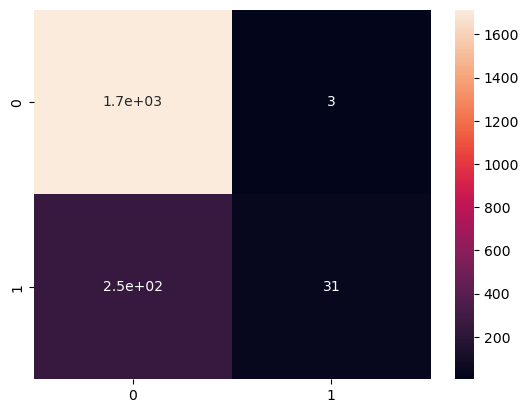

In [126]:
#from colorsetup import colors, palette
#sns.set_palette(palette)
#sns.set_context('talk')
#fig, axs = plt.subplots(2, 2)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True )